<a href="https://colab.research.google.com/github/mykon23/AI-2020/blob/master/Activities/Activity3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic data analysis using Pandas

In [19]:
##Get the data from its location
!wget -O Pokemon.csv https://github.com/mykon23/AI-2020/blob/master/Data/Pokemon.csv?raw=true

--2020-09-12 00:59:20--  https://github.com/mykon23/AI-2020/blob/master/Data/Pokemon.csv?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mykon23/AI-2020/raw/master/Data/Pokemon.csv [following]
--2020-09-12 00:59:21--  https://github.com/mykon23/AI-2020/raw/master/Data/Pokemon.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Pokemon.csv [following]
--2020-09-12 00:59:21--  https://raw.githubusercontent.com/mykon23/AI-2020/master/Data/Pokemon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [20]:
import pandas as pd

In [21]:
pokemon_data = pd.read_csv('Pokemon.csv', delimiter=',')

In [22]:
print(pokemon_data.shape)

(800, 13)


In [23]:
print(pokemon_data.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [24]:
print(pokemon_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None


In [25]:
## Acquire DataFrame pertaining to the legendary pokemon
legendary = pokemon_data[ pokemon_data['Legendary'] ]

## Aquire the statistics of interest
legendary_stats = legendary[ ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'] ]

In [26]:
legendary_stats.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
156,580,90,85,100,95,125,85
157,580,90,90,85,125,90,100
158,580,90,100,90,125,85,90
162,680,106,110,90,154,90,130
163,780,106,190,100,154,100,130


In [27]:
legendary_stats.isnull().values.any()
# If there are blank cells
legendary_stats = legendary_stats.dropna()

In [28]:
legendary_stats.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615
std,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323
min,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000
25%,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000
50%,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000
75%,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000
max,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000


In [29]:
legendary_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,65.0,637.384615,60.937389,580.0,580.0,600.0,680.0,780.0
HP,65.0,92.738462,21.722164,50.0,80.0,91.0,105.0,150.0
Attack,65.0,116.676923,30.348037,50.0,100.0,110.0,131.0,190.0
Defense,65.0,99.661538,28.255131,20.0,90.0,100.0,115.0,200.0
Sp. Atk,65.0,122.184615,31.104608,50.0,100.0,120.0,150.0,194.0
Sp. Def,65.0,105.938462,28.827004,20.0,90.0,100.0,120.0,200.0
Speed,65.0,100.184615,22.952323,50.0,90.0,100.0,110.0,180.0


In [30]:
legendary_stats['HP'].value_counts()

100    12
80     11
50      6
90      5
106     5
91      4
79      4
125     3
75      2
89      2
126     2
105     2
150     2
108     1
110     1
115     1
70      1
120     1
Name: HP, dtype: int64

In [31]:
legendary_stats.sort_values(by='HP', ascending=False).head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
545,680,150,120,100,120,100,90
544,680,150,100,120,100,120,90
792,680,126,131,95,131,98,99
793,680,126,131,95,131,98,99
712,700,125,120,90,170,100,95


In [32]:
## Print the statistics of interest
for k in legendary_stats.columns:
  print(f'{k}: Mean: {legendary_stats[k].mean()} Std: {legendary_stats[k].std()}')

Total: Mean: 637.3846153846154 Std: 60.93738905315346
HP: Mean: 92.73846153846154 Std: 21.722163884985164
Attack: Mean: 116.67692307692307 Std: 30.348037257533072
Defense: Mean: 99.66153846153846 Std: 28.255130575634468
Sp. Atk: Mean: 122.18461538461538 Std: 31.10460793219205
Sp. Def: Mean: 105.93846153846154 Std: 28.827003899922627
Speed: Mean: 100.18461538461538 Std: 22.952323076660115


In [33]:
from sklearn.utils import shuffle
legendary_stats = shuffle(legendary_stats)
legendary_stats.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
794,600,108,100,121,81,95,95
545,680,150,120,100,120,100,90
543,670,110,160,110,80,110,100
269,680,106,90,130,90,154,110
419,600,80,90,80,130,110,110


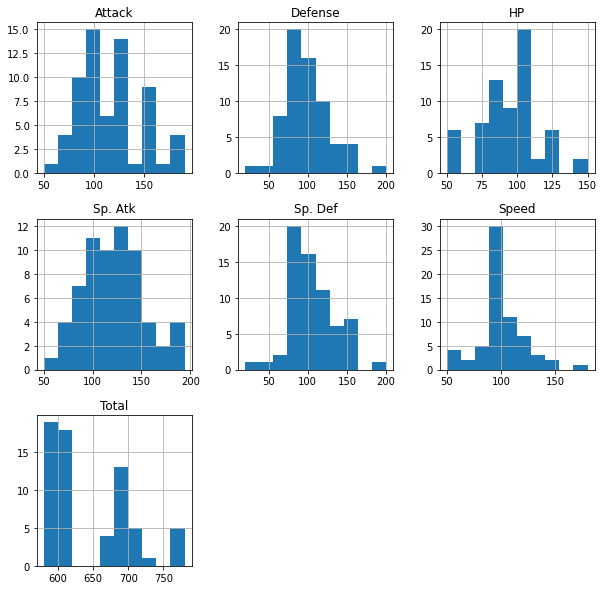

In [34]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = ((10,10))
legendary_stats.hist()
plt.show()

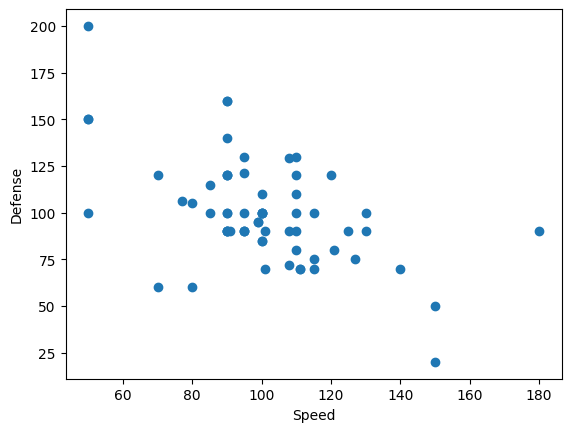

In [35]:
plt.rcParams.update(plt.rcParamsDefault)

## Plot the relationship between Speed and Defense
plt.scatter( legendary_stats['Speed'], legendary_stats['Defense'])
plt.xlabel('Speed')
plt.ylabel('Defense')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


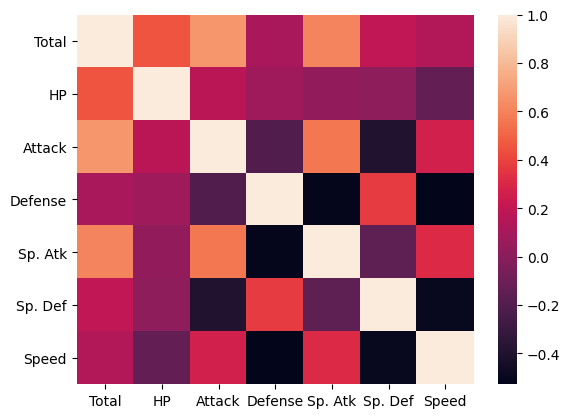

In [36]:
import seaborn as sns
correlation = legendary_stats.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)